In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Data/202201-divvy-tripdata.csv')

In [4]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [5]:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103770 entries, 0 to 103769
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             103770 non-null  object 
 1   rideable_type       103770 non-null  object 
 2   started_at          103770 non-null  object 
 3   ended_at            103770 non-null  object 
 4   start_station_name  87510 non-null   object 
 5   start_station_id    87510 non-null   object 
 6   end_station_name    85843 non-null   object 
 7   end_station_id      85843 non-null   object 
 8   start_lat           103770 non-null  float64
 9   start_lng           103770 non-null  float64
 10  end_lat             103684 non-null  float64
 11  end_lng             103684 non-null  float64
 12  member_casual       103770 non-null  object 
dtypes: float64(4), object(9)
memory usage: 10.3+ MB


In [6]:
data.shape

(103770, 13)

In [7]:
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      17927
end_station_id        17927
start_lat                 0
start_lng                 0
end_lat                  86
end_lng                  86
member_casual             0
dtype: int64

In [8]:
data.describe()

,start_lat,start_lng,end_lat,end_lng
count,103770.000000,103770.000000,103684.000000,103684.000000
mean,41.896850,-87.648622,41.896950,-87.648964
std,0.049664,0.053199,0.048400,0.031342
min,41.650000,-87.830000,41.648501,-87.830000
25%,41.879255,-87.664169,41.879344,-87.664358
50%,41.894877,-87.644098,41.895501,-87.644098
75%,41.925602,-87.629912,41.925602,-87.629912
max,45.635034,-73.796477,42.070000,-87.520000


In [9]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [10]:
#Converting the data type of the 'started_at', 'ended_at' columns from object to datetime data type
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103770 entries, 0 to 103769
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             103770 non-null  object        
 1   rideable_type       103770 non-null  object        
 2   started_at          103770 non-null  datetime64[ns]
 3   ended_at            103770 non-null  datetime64[ns]
 4   start_station_name  87510 non-null   object        
 5   start_station_id    87510 non-null   object        
 6   end_station_name    85843 non-null   object        
 7   end_station_id      85843 non-null   object        
 8   start_lat           103770 non-null  float64       
 9   start_lng           103770 non-null  float64       
 10  end_lat             103684 non-null  float64       
 11  end_lng             103684 non-null  float64       
 12  member_casual       103770 non-null  object        
dtypes: datetime64[ns](2), float64

In [12]:
data['ride_length'] = data['ended_at'] - data['started_at']

In [13]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02


In [14]:
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      17927
end_station_id        17927
start_lat                 0
start_lng                 0
end_lat                  86
end_lng                  86
member_casual             0
ride_length               0
dtype: int64

In [15]:
data['day_of_week'] = data.started_at.dt.day_name()

In [16]:
data['day_of_week'].unique()

array(['Thursday', 'Monday', 'Tuesday', 'Sunday', 'Saturday', 'Friday',
       'Wednesday'], dtype=object)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103770 entries, 0 to 103769
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             103770 non-null  object         
 1   rideable_type       103770 non-null  object         
 2   started_at          103770 non-null  datetime64[ns] 
 3   ended_at            103770 non-null  datetime64[ns] 
 4   start_station_name  87510 non-null   object         
 5   start_station_id    87510 non-null   object         
 6   end_station_name    85843 non-null   object         
 7   end_station_id      85843 non-null   object         
 8   start_lat           103770 non-null  float64        
 9   start_lng           103770 non-null  float64        
 10  end_lat             103684 non-null  float64        
 11  end_lng             103684 non-null  float64        
 12  member_casual       103770 non-null  object         
 13  ride_length   

In [18]:
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      17927
end_station_id        17927
start_lat                 0
start_lng                 0
end_lat                  86
end_lng                  86
member_casual             0
ride_length               0
day_of_week               0
dtype: int64

In [19]:
#Dropping Missing Values.
df = data.dropna(axis=0)

In [20]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64

# Univariate Analysis

In [21]:
#grouping the columns by their data types.
df.columns.to_series().groupby(data.dtypes).groups

{datetime64[ns]: ['started_at', 'ended_at'], float64: ['start_lat', 'start_lng', 'end_lat', 'end_lng'], timedelta64[ns]: ['ride_length'], object: ['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'member_casual', 'day_of_week']}

<AxesSubplot:title={'center':'Day Of Week'}>

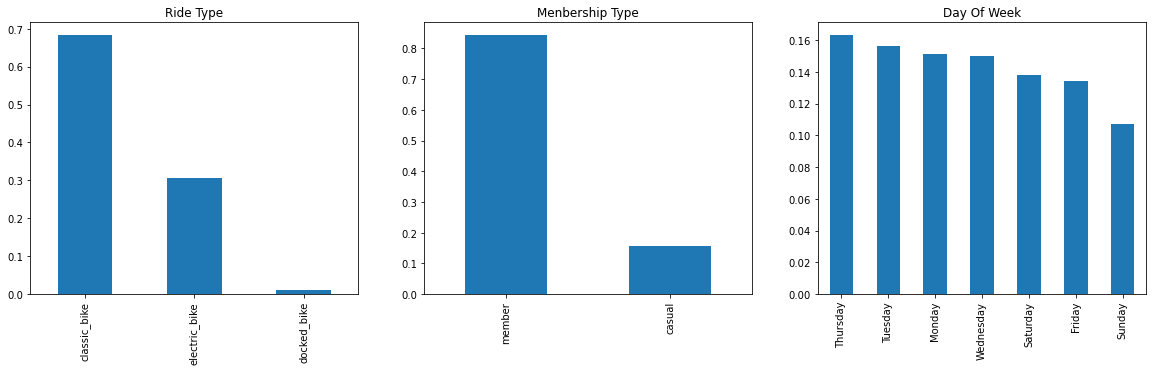

In [22]:
#Exploring categorical columns with object datatype
plt.subplot(1,3,1)
df['rideable_type'].value_counts(normalize=True).plot.bar(figsize=(20,5), title='Ride Type')
plt.subplot(1,3,2)
df['member_casual'].value_counts(normalize=True).plot.bar(figsize=(20,5), title='Menbership Type')
plt.subplot(1,3,3)
df['day_of_week'].value_counts(normalize=True).plot.bar(figsize=(20,5), title='Day Of Week')

In [23]:
df.shape

(80128, 15)

# Bivariate Analysis

In [24]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,Monday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,Tuesday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,Tuesday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103716,B7FDA1D0A96177A3,classic_bike,2022-01-17 11:21:44,2022-01-17 11:28:02,Wells St & Walton St,TA1306000011,Kingsbury St & Kinzie St,KA1503000043,41.899930,-87.634430,41.889177,-87.638506,member,0 days 00:06:18,Monday
103760,222422C4575505E3,electric_bike,2022-01-13 09:49:02,2022-01-13 10:02:22,Milwaukee Ave & Wabansia Ave,13243,Kingsbury St & Kinzie St,KA1503000043,41.912670,-87.681550,41.889177,-87.638506,member,0 days 00:13:20,Thursday
103763,F62C4E58DB8DC100,electric_bike,2022-01-19 16:40:42,2022-01-19 16:44:57,Broadway & Waveland Ave,13325,Clark St & Grace St,TA1307000127,41.949079,-87.648614,41.950780,-87.659172,casual,0 days 00:04:15,Wednesday
103767,CA281AE7D8B06F5A,electric_bike,2022-01-10 16:14:51,2022-01-10 16:20:58,Broadway & Waveland Ave,13325,Clark St & Grace St,TA1307000127,41.949066,-87.648611,41.950780,-87.659172,casual,0 days 00:06:07,Monday


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

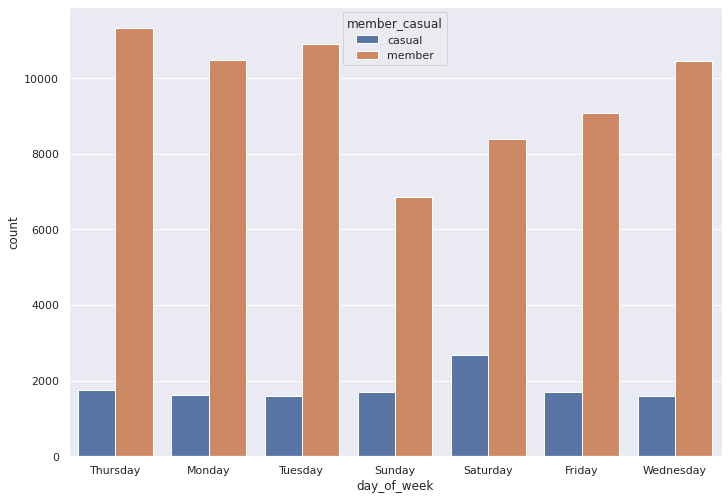

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='day_of_week', hue='member_casual', data= df)

<AxesSubplot:xlabel='rideable_type', ylabel='count'>

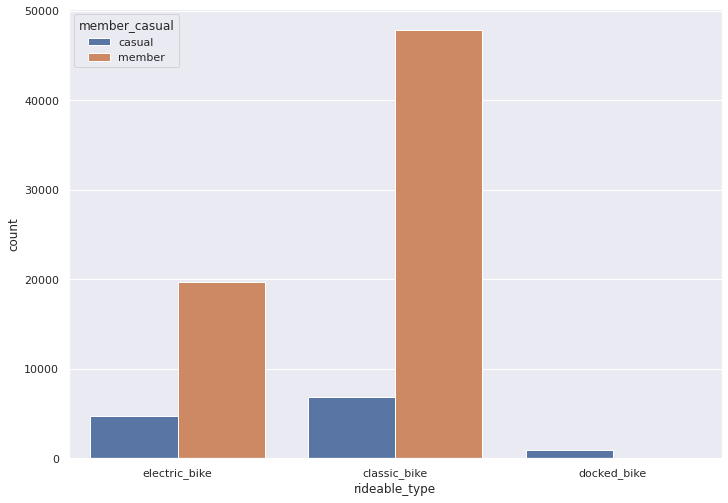

In [36]:
sns.countplot(x='rideable_type', hue='member_casual', data= df)

In [40]:
df.columns.to_series().groupby(data.dtypes).groups

{datetime64[ns]: ['started_at', 'ended_at'], float64: ['start_lat', 'start_lng', 'end_lat', 'end_lng'], timedelta64[ns]: ['ride_length'], object: ['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'member_casual', 'day_of_week']}

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

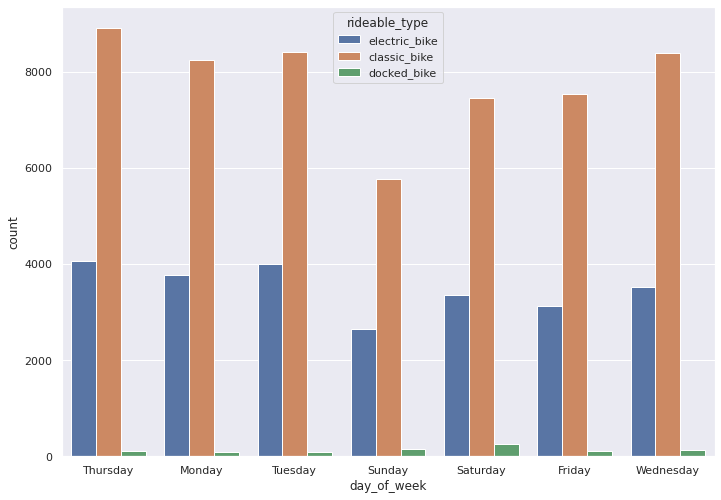

In [48]:
sns.countplot(x='day_of_week', hue='rideable_type', data= df)

In [50]:
df.to_csv('./Data/cleaned_data.csv', index=False, header=True)